In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpl_style

from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

from kernal import linear, polynomial, rbf

# Ej 1

### a) Construct a set 'TP3-1' of linearly separable examples at < 2 (e.g., randomly generate points in [0, 5]x[0, 5] such that they belong to two linearly separable classes 1 and -1). Use a simple step perceptron to separate the ensemble linearly. Is the separation hyperplane optimal? Justify the answer.

§

### Defenitions for plotting and perceptron

In [2]:
# This is for the spliting line function

'''
n_items = the amount of items generated randomly in [0,5][0,5]
b0 = the bias
b1 and b2 = the weights of the line on which the class split is made.

Class is eiter 1 or -1 depending on if it's above or below the line
'''

choice_list = ['normal',
               'steep',
               'steep_low',
               'shallow',
               'shallow_high',
               'negative',]

def choose(choice='normal', n=1000):
    n_items = n

    if choice == 'normal': b0=1; b1=2; b2=-2
    if choice == 'steep': b0=-2; b1=2; b2=-1
    if choice == 'steep_low': b0=-8; b1=3; b2=-1
    if choice == 'shallow': b0=1; b1=2; b2=-4
    if choice == 'shallow_high': b0=9; b1=1; b2=-3
    if choice == 'negative': b0=5; b1=-1; b2=-1

    return n_items, float(b0), float(b1), float(b2)



# Use this number (0 to 5) to choose the line you want to use
num = 0
amount = 8

n_items, b0, b1, b2 = choose(choice_list[num], amount)
n_items, ogb0, ogb1, ogb2 = choose(choice_list[num], amount) # og = original, only used for plot titles

print(f"kind: {choice_list[num]} \nb0: {b0} \nb1: {b1} \nb2: {b2}")

kind: normal 
b0: 1.0 
b1: 2.0 
b2: -2.0


In [3]:
def plotting(data, b0=b0, b1=b1, b2=b2, line=True, legend=False, title="Title", subtitle=False):
    
    '''
    This will plot the scatterplot of the data and the line. It's for visualisation only
    Choose a different b0, b1, b2 to plot a different line if you want
    line = true will draw this line, false won'test_1
    Legend = true removes the legend. This might be anoying with some plots  
    '''

    factor = ogb0/b0
    b0n = b0* factor
    b1n = b1*factor
    b2n = b2*factor


    # normalizing_factor = b0/bias
    # weights_normalized = weights * normalizing_factor
    # bias_normalized = bias * normalizing_factor

    #For the line in the plot
    if line:
        x1_for_line = np.linspace(0, 5, 100)
        x2_for_line = (-b0 - b1 * x1_for_line) / b2
        plt.figure(figsize=(8, 6))
        plt.plot(x1_for_line, x2_for_line, label=f'{round(b0)} + {round(b1)}x1 + {round(b2)}x2', color='green', linestyle='--')
        plt.scatter(data['x1'], data['x2'], label='Data', c=data['y'], marker='.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.axhline(0, color='grey', linewidth=0.5)
        plt.axvline(0, color='grey', linewidth=0.5)

    else:
        plt.figure(figsize=(8, 6))
        # plt.plot(x1_for_line, x2_for_line, label=f'{round(b0)} + {round(b1)}x1 + {round(b2)}x2', color='blue')
        plt.scatter(data['x1'], data['x2'], label='Data', c=data['y'], marker='.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.axhline(0, color='grey', linewidth=0.5)
        plt.axvline(0, color='grey', linewidth=0.5)

    # Set the title and subtitle
    plt.title(title, fontsize=14)
    if subtitle:
        plt.suptitle(f"new: {round(b0n, 3)} + {round(b1n, 3)} + {round(b2n, 3)}\nold: {round(ogb0, 3)} + {round(ogb1, 3)} + {round(ogb2, 3)}", fontsize=11)

    # Make the background transparent
    plt.gca().set_facecolor('none')

    # Hide the outer lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    if legend:    
        plt.legend()
    plt.show()

In [4]:
def report(test_data, weights, bias):

    '''
    test data = unseen data
    weights = weights of the model like [w1, w2]
    bias = bias of the model
    '''
    
    y_pred_1 = np.dot(test_data[['x1', 'x2']].values, weights) + bias
    y_pred_1 = np.where(y_pred_1 > 0, 1, -1)

    # Calculate the classification report from sklearn metrics
    report = classification_report(test_data['y'], y_pred_1)
    print(report)

In [5]:
def perceptron_train(X, y, learning_rate=0.1, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction > 0:
                y_pred = 1
            else:
                y_pred = -1
            
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
    
    return weights, bias

### Data creation
train_1, test_1, train_2, test_2

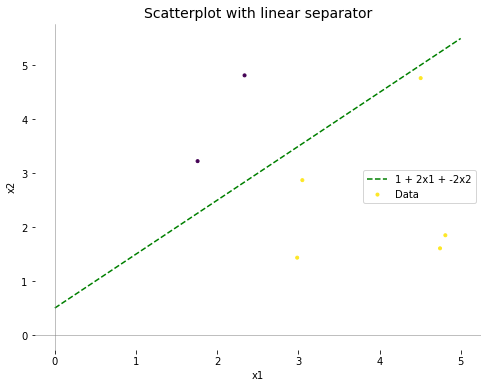

         x1        x2  y
0  4.811058  1.849734  1
4  4.507141  4.764537  1
6  4.745465  1.607374  1
5  1.758511  3.224592 -1
3  3.049209  2.872058  1
1  2.337134  4.815500 -1
7  2.985539  1.434043  1


In [34]:
# the following is for the linespace representation of the line in the plot
x1_for_line = np.linspace(0, 5, 100)
x2_for_line = (-b0 - b1 * x1_for_line) / b2

x1 = [random.uniform(0, 5) for i in range(n_items)]
x2 = [random.uniform(0, 5) for i in range(n_items)]
y = [1 if (b0 + b1 * x1[i] + b2 * x2[i]) > 0 else -1 for i in range(n_items)]

# create TP3_1, TP3_2, and creating a train test split
TP3_1 = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
TP3_2 = TP3_1.copy()
train_1, test_1 = train_test_split(TP3_1, test_size=0.1)
train_2, test_2 = train_test_split(TP3_2, test_size=0.1)

plotting(train_1, b0, b1, b2, legend=True, title="Scatterplot with linear separator")
print(train_1)


### Training

In [7]:
# perform the perceptron training
weights, bias = perceptron_train(train_1[['x1', 'x2']].values, train_1['y'].values, n_epochs=100, learning_rate=0.1)

w_old = weights
b_old = bias

### Prediction and testing

In [8]:
report(test_1, weights, bias)

# The report is avtually very nice. F1 of 1 an precision of 1 as well
# All the test datapoints are classified correctly 

# This changes thought when using higher sample sizes but it will remain high

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\flo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\flo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\flo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie


### b) Obtain the optimal hyperplane from the hyperplane obtained with the perceptron simple.

### pt 2

In [28]:
def distance_to_line(a, b, c, x, y):
    return abs(a * x + b * y + c) / math.sqrt(a * a + b * b)

def line_from_points(x1, y1,x2, y2):
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2
    return a,b,c

def find_max_margin(set_1, set_2, points_to_consider):
    points_to_consider = min(points_to_consider, len(set_1))
    best_seperation = ()
    best_margin = 0
    for i in range(points_to_consider):
        for j in range(i+1, points_to_consider):
            #take two points from set one that are close to the line and create a new line
            x1, y1, _ = set_1[i]
            x2, y2, _ = set_1[j]
            a,b,c = line_from_points(x1, y1,x2, y2)
            
            #find closest point in set 2
            min_distance = float('inf') 
            closest_point = None
            for p in set_2:
                d = distance_to_line(a,b,c,p[0],p[1])
                if d < min_distance:
                    min_distance = d
                    closest_point = p

            #calculate center between the two candidates of set 1 and the closest point of set 2
            p1 = np.array([x1, y1])
            p2 = np.array([x2, y2])
            p3 = np.array([closest_point[0], closest_point[1]])
            v1 = p2 - p1 
            v2 = p3 - p1
            v_a = v1.dot(v2) / v1.dot(v1) * v1 

            mid_point = (p1 + v_a + p3) * 0.5

            normal_v = mid_point - p3
            margin = math.sqrt(normal_v[0]**2 + normal_v[1]**2)

            mid_point_2 = mid_point + v1
            a_new, b_new, c_new = line_from_points(mid_point[0],mid_point[1],mid_point_2[0],mid_point_2[1])

            #test if it still seperates the two classes
        
            test_for_set_1 = ((-a_new*set_1[0][0] - c_new) / b_new) >= set_1[0][1]
            seperated = True
            for p in set_1:
                if ((-a_new*p[0] - c_new) / b_new >= p[1]) != test_for_set_1:
                    seperated = False
                    break
                
            if seperated:
                for p in set_2:
                    if ((-a_new*p[0] - c_new) / b_new >= p[1]) == test_for_set_1:
                        seperated = False
                        break
            # if the new line separates well the two sets 
            if seperated :print(f'line: {(a_new,b_new,c_new)} margin : {margin}')

            if seperated and margin > best_margin:
                best_margin = margin
                best_seperation = (a_new,b_new,c_new)
    
    return best_seperation, best_margin
                

def perceptron_optimal_2(w_old,b_old, points_x, points_y ,points_to_consider = 2):
    set_1 = []
    set_2 = []
    a = w_old[0]
    b = w_old[1]
    c = b_old
    if points_to_consider < 2 : 
        print("needs at least 2 points to find optimal hyperplane")
        return

    for i in range(len(points_x)):
        x = points_x[i][0]
        y = points_x[i][1]
        d = distance_to_line(a,b,c, x, y)
        if points_y[i] == 1:
            set_1.append((x,y,d))
        else:
            set_2.append((x,y,d))

    #sort by distance
    set_1 = sorted(set_1, key=lambda tup: tup[2])
    set_2 = sorted(set_2, key=lambda tup: tup[2])
    m1 = find_max_margin(set_1,set_2,points_to_consider)
    print(m1)

    m2 = find_max_margin(set_2,set_1,points_to_consider)
    print(m2)

    return m1 if m1[1] > m2[1] else m2


In [35]:
print(train_1)

w_old, b_old = perceptron_train(train_1[['x1', 'x2']].values, train_1['y'].values)
best_seperation, best_margin = perceptron_optimal_2(w_old,b_old, train_1[['x1', 'x2']].values,train_1['y'].values, 2)

#optimal_hyperplane, optimal_margin, hyperplanes = perceptron_optimal(train_1[['x1', 'x2']].values, train_1['y'].values)
# report(test_1, weights, bias)

         x1        x2  y
0  4.811058  1.849734  1
4  4.507141  4.764537  1
6  4.745465  1.607374  1
5  1.758511  3.224592 -1
3  3.049209  2.872058  1
1  2.337134  4.815500 -1
7  2.985539  1.434043  1
line: (-1.8924787083893344, 1.4579313888515046, 0.10500576352354773) margin : 0.6188072781223776
((-1.8924787083893344, 1.4579313888515046, 0.10500576352354773), 0.6188072781223776)
line: (1.5909085896854513, -0.578623053547727, -2.0604908106987487) margin : 0.6667293458874864
((1.5909085896854513, -0.578623053547727, -2.0604908106987487), 0.6667293458874864)


         x1        x2  y
0  4.811058  1.849734  1
4  4.507141  4.764537  1
6  4.745465  1.607374  1
5  1.758511  3.224592 -1
3  3.049209  2.872058  1
1  2.337134  4.815500 -1
7  2.985539  1.434043  1
-0.3488325358506807
-0.3488325358506807


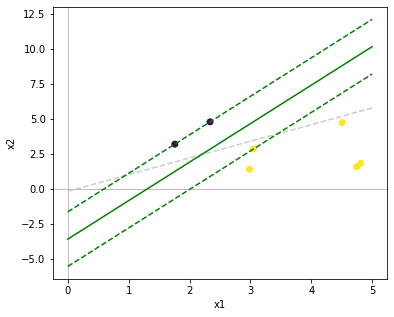

In [36]:

# Function for hyperplane representation for old simple perceptron hyperplane: input weights and bias
def x_y(weights, bias, margin=0): # plotting the output
    x_boundary = np.linspace(0, 5, 100)
    y_boundary = (-weights[0] * x_boundary - bias) / weights[1]
    return x_boundary, y_boundary

# function for hyperplane representaion for new hyperplanes: input optimal_hyperplane
def x_y_margin(weights, bias, delta_multiplier = 1, margin=0):
    # Define the original decision boundary
    x_boundary = np.linspace(0, 5, 100)

    angle_radians = math.atan(weights[1] / weights[0])
    print(angle_radians)
    delta_y = (margin) / math.sin(angle_radians)

    y_boundary = (-weights[0] * x_boundary - bias) / weights[1] + delta_y*delta_multiplier

    return x_boundary, y_boundary


# plotting the output
plt.figure(figsize=(6, 5))
plt.scatter(train_1['x1'], train_1['x2'], c=train_1['y'], marker='o')
print(train_1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

# old hyperplane 
x_old, y_old = x_y(w_old, b_old)
plt.plot(x_old, y_old, label=f"Original: {b0} + {b1}x1 + {b2}x2", color='#ccc', linestyle='--')

#new optimal hyperplane
x_new, y_new = x_y((best_seperation[0],best_seperation[1]),best_seperation[2])
plt.plot(x_new, y_new, label=f"Original: {b0} + {b1}x1 + {b2}x2", color='green', linestyle='-')


x_new, y_new = x_y_margin((best_seperation[0],best_seperation[1]),best_seperation[2],1,best_margin)
plt.plot(x_new, y_new, label=f"Original: {b0} + {b1}x1 + {b2}x2", color='green', linestyle='--')

x_new, y_new = x_y_margin((best_seperation[0],best_seperation[1]),best_seperation[2],-1,best_margin)
plt.plot(x_new, y_new, label=f"Original: {b0} + {b1}x1 + {b2}x2", color='green', linestyle='--')

#def plane_test(optimal_hyperplane):
#    x_new, y_new = x_y_new(optimal_hyperplane)
#    plt.plot(x_new, y_new, label="new", color='green', linestyle='--')


# plane_test(optimal_hyperplane)


# plt.legend()
plt.show()

## break - Old stuff below.
Doesnt really work because the weights and biases are saved in different formats


C:\Users\flo12\AppData\Local\Temp\ipykernel_21804\569284083.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  normalizing_factor = b0/bias
ic| normalizing_factor: inf
ic| weights_normalized: array([ inf, -inf])


Normalizing factor: inf
Final weights: [ inf -inf]
Final bias: nan

Hyperplane: nan + infx1 + -infx2


C:\Users\flo12\AppData\Local\Temp\ipykernel_21804\569284083.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  bias_normalized = bias * normalizing_factor


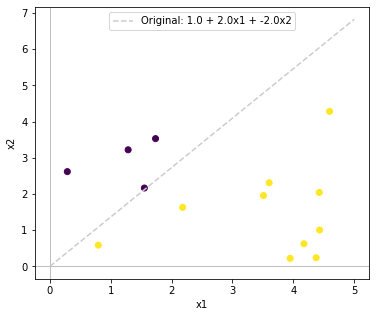

In [ ]:
# First normalize the model to b0 so that the models b0 will be the same as the generated data b0
normalizing_factor = b0/bias
ic(normalizing_factor)

weights_normalized = weights * normalizing_factor
ic(weights_normalized)

bias_normalized = bias * normalizing_factor

print(f'Normalizing factor: {normalizing_factor}')
print(f'Final weights: {weights_normalized}\nFinal bias: {bias_normalized}\n\nHyperplane: {bias_normalized.round(2)} + {weights_normalized[0].round(2)}x1 + {weights_normalized[1].round(2)}x2')

def x_y(weights, bias, margin=0): # plotting the output
    x_boundary = np.linspace(0, 5, 100)
    y_boundary = (-weights[0] * x_boundary - (bias + margin)) / weights[1]
    return x_boundary, y_boundary

# plotting the output
plt.figure(figsize=(6, 5))
plt.scatter(train_1['x1'], train_1['x2'], c=train_1['y'], marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
# plt.plot(x_boundary, y_boundary, label=f"Result: {round(bias_normalized, 2)} + {round(weights_normalized[0], 2)}x1 + {weights_normalized[1].round(2)}x2", color='green', linestyle='--')


# old hyperplane 
x_old, y_old = x_y(w_old, b_old)
plt.plot(x_old, y_old, label=f"Original: {b0} + {b1}x1 + {b2}x2", color='#ccc', linestyle='--')

# new hyperplane
# margin = 1
# x_new, y_new = x_y(weights, bias)                                   # cre3ate the new line following the function perceptron_optimal
# x_bu, y_bu = x_y(weights, bias, margin/normalizing_factor)          # adds margin to the new x_y defined line
# x_bl, y_bl = x_y(weights, bias, -margin/normalizing_factor)         # same here

# plt.plot(x_new, y_new, label="new", color='green', linestyle='--')
# plt.plot(x_bu, y_bu, label=f"M = {margin}", color='#999', linestyle='-')
# plt.plot(x_bl, y_bl, color='#ccc', linestyle='-')

plt.legend()
plt.show()

### c) Construct the set 'TP3-2' in an analogous way to how you constructed the set 'TP3-1' but this time include some examples that are misclassified near the separating hyperplane. Use a simple perceptron to separate the two classes. Comment on the results.

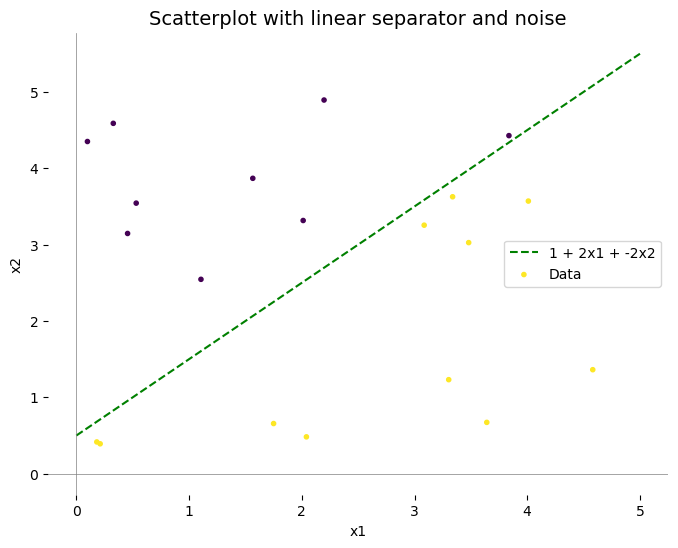

In [ ]:
n_additional_points = round(n_items / 2)
additional_data = []

# Generate additional data points near the separating hyperplane
for _ in range(n_additional_points):
    x1_new = random.uniform(0, 5)
    x2_new = random.uniform(0, 5)
    
    # Calculate the distance from the point to the separating hyperplane
    distance = abs(b0 + b1 * x1_new + b2 * x2_new) / (b1 ** 2 + b2 ** 2) ** 0.5
    
    # Check if the distance is less than 0.5 (within 0.5 units from the hyperplane), if so, append.
    if distance <= 0.5:
        class_label = 1 if not (b0 + b1 * x1_new + b2 * x2_new) > 0 else -1
        additional_data.append({'x1': x1_new, 'x2': x2_new, 'y': (class_label)}) # for some reason it does it oposite so -1 to fix


additional_df = pd.DataFrame(additional_data)
TP3_2 = pd.concat([TP3_2, additional_df], ignore_index=False)

plotting(TP3_2, line=True, legend=True, title="Scatterplot with linear separator and noise")

### d) Use SVM to classify both set 'TP3-1' and set 'TP3-2'. Compare the results with those obtained in points a) and c).


In [ ]:
data = TP3_2

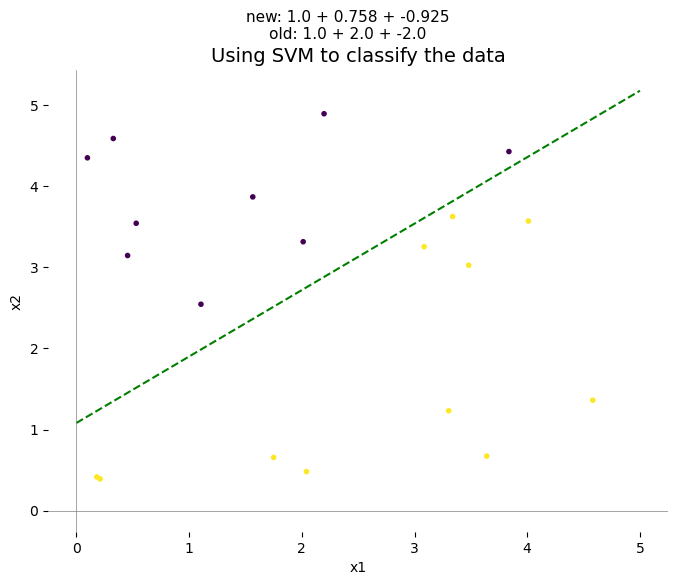

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
def svm_train(data, learning_rate=0.01, lambda_param=0.01, num_epochs=1000, tolerance=1e-5):
    # Extract features and labels
    X = data[['x1', 'x2']].values
    y = data['y'].values

    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    for epoch in range(num_epochs):
        gradient_w = np.zeros(w.shape)
        gradient_b = 0
        cost = 0

        for i in range(len(X)):
            decision = y[i] * (np.dot(w, X[i]) + b)
    
            if decision < 1:
                # Misclassified point
                gradient_w += (X[i] * y[i])
                gradient_b += y[i]
                cost += 1 - decision

        # Regularization term
        gradient_w -= 2 * lambda_param * w

        # Update weights and bias
        w = w + learning_rate * gradient_w
        b = b + learning_rate * gradient_b

        # Check convergence
        if cost < tolerance:
            break

    return w, b


w, b = svm_train(data, learning_rate=0.01, lambda_param=0.01)

plotting(data, b0=b, b1=w[0], b2=w[1], 
         subtitle=True, 
         title='Using SVM to classify the data')

report(data, w, b)
